# Chemical Groups

The `medchem.groups` module contains a large list of chemical and functional groups to classify compounds. Its easy-to-use API allows you to specify either a whole family or a subset of chemical groups. For example, you can load all the known hinge binders motifs with `ChemicalGroup("hinge_binders*")`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import datamol as dm
import pandas as pd

import medchem
from medchem.groups import ChemicalGroup

## List the available chemical and functional groups

List the default chemical groups

In [3]:
medchem.groups.list_default_chemical_groups()

['emerging_perfluoroalkyls',
 'montmorillonite_adsorption',
 'common_monomer_repeating_units',
 'electrophilic_warheads_for_kinases',
 'common_warhead_covalent_inhibitors',
 'rings_in_drugs',
 'iupac_blue_book_rings',
 'phase_2_hetereocyclic_rings',
 'privileged_scaffolds',
 'iupac_blue_book',
 'common_rgroup_replacements',
 'braf_inhibitors',
 'privileged_kinase_inhibitor_scaffolds',
 'common_organic_solvents',
 'amino_acid_protecting_groups',
 'schedule_one',
 'schedule_two',
 'schedule_three',
 'schedule_four',
 'schedule_five',
 'interstellar_space',
 'vitamins',
 'open_smiles',
 'amino_acids',
 'pihkal',
 'aggregator',
 'basic_groups',
 'extended_groups',
 'hinge_binders']

List common functional group names. The list is too long to we only show a few elements.

In [4]:
medchem.groups.list_functional_group_names()[40:50]

['Enediols',
 'Ethers',
 'Dialkylethers',
 'Alkylarylethers',
 'Diarylethers',
 'Thioethers',
 'Disulfides',
 'Peroxides',
 'Hydroperoxides',
 'Hydrazine derivatives']

You can also retrieve a `dict` of functional group to their SMARTS. Here again we only show a small subset.

In [5]:
fg_map = medchem.groups.get_functional_group_map()

dict(list(fg_map.items())[:10])

{'1,2 – Aminophenols': 'c([OH1])c[NX3]([#1,#6])[#1,#6]',
 '1,2 – Aminothiophenols': 'c([SH1])c[NX3]([#1,#6])[#1,#6]',
 '1,2 – Diphenols': 'c([OH1])c([OH1])',
 '1,2 – Dithiophenols': 'c([SH1])c([SH1])',
 '1,2,3,4-Oxatriazoles (HS)': '[oR1]1[nR1][nR1][nR1][cR1]1',
 '1,2,3,4-Thiatriazoles (HS)': '[sR1]1[nR1][nR1][nR1][cR1]1',
 '1,2,3,5-Oxatriazoles (HS)': '[oR1]1[nR1][nR1][cR1][nR1]1',
 '1,2,3,5-Thiatriazoles (HS)': '[sR1]1[nR1][nR1][cR1][nR1]1',
 '1,2,3-Oxadiazoles (HS)': '[oR1]1[nR1][nR1][cR1][cR1]1',
 '1,2,3-Triazoles (HS)': '[nR1]1[nR1][nR1][cR1][cR1]1'}

## Load one ore more groups and filter a list of molecules

In [6]:
group = ChemicalGroup(groups=["basic_groups", "rings_in_drugs"])

group

The groups are part of a hierarchy you can explore with:

In [7]:
group.list_hierarchy_groups()

['medicinal_chemistry.rings.rings_in_drugs.rings_in_drugs',
 'medicinal_chemistry.functional_groups.basic_groups']

Check whether a molecule match with the created group.

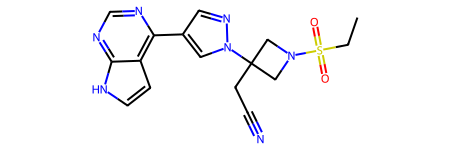

In [8]:
mol = dm.to_mol("CCS(=O)(=O)N1CC(C1)(CC#N)N2C=C(C=N2)C3=C4C=CNC4=NC=N3")

mol

In [9]:
group.get_matches(mol, use_smiles=True)

,name,smiles,smarts,group,matches
204,diazine,C1=NC=CC=N1,[#6]1:[#7]:[#6]:[#6]:[#6]:[#7]:1,rings_in_drugs,"((24, 23, 22, 18, 17, 25),)"
234,1H-pyrazole,N1=CC=CN1,[#7]1:[#6]:[#6]:[#6]:[#7H]:1,rings_in_drugs,"((12, 13, 14, 15, 16),)"
257,1H-pyrrole,C1=CC=CN1,[#6]1:[#6]:[#6]:[#6]:[#7H]:1,rings_in_drugs,"((20, 19, 18, 22, 21),)"


You can also display all the filters for a given group.

In [10]:
group.data.head()

,name,smiles,smarts,group,hierarchy,mol_smarts,mol
191,benzene,C1=CC=CC=C1,[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1,rings_in_drugs,medicinal_chemistry.rings.rings_in_drugs.rings...,<rdkit.Chem.rdchem.Mol object at 0x7f6f80cc6ea0>,<rdkit.Chem.rdchem.Mol object at 0x7f6f80bc6570>
192,pyridine,C1=CC=CN=C1,[#6]1:[#6]:[#6]:[#6]:[#7]:[#6]:1,rings_in_drugs,medicinal_chemistry.rings.rings_in_drugs.rings...,<rdkit.Chem.rdchem.Mol object at 0x7f6f80cc6f80>,<rdkit.Chem.rdchem.Mol object at 0x7f6f80bc5e70>
193,piperidine,N1CCCCC1,[#7]1-[#6]-[#6]-[#6]-[#6]-[#6]-1,rings_in_drugs,medicinal_chemistry.rings.rings_in_drugs.rings...,<rdkit.Chem.rdchem.Mol object at 0x7f6f80cc6e30>,<rdkit.Chem.rdchem.Mol object at 0x7f6f80bc6340>
194,piperazine,N1CCNCC1,[#7]1-[#6]-[#6]-[#7]-[#6]-[#6]-1,rings_in_drugs,medicinal_chemistry.rings.rings_in_drugs.rings...,<rdkit.Chem.rdchem.Mol object at 0x7f6f80cc6dc0>,<rdkit.Chem.rdchem.Mol object at 0x7f6f80bc5cb0>
195,cyclohexane,C1CCCCC1,[#6]1-[#6]-[#6]-[#6]-[#6]-[#6]-1,rings_in_drugs,medicinal_chemistry.rings.rings_in_drugs.rings...,<rdkit.Chem.rdchem.Mol object at 0x7f6f80cc6d50>,<rdkit.Chem.rdchem.Mol object at 0x7f6f80bc6810>


## Load groups from a hierarchy

Groups are organized as a hierarchy. It's possible to load many groups at once.

In [11]:
medchem.groups.list_default_chemical_groups(hierarchy=True)[:20]

['environment.emerging_perfluoroalkyls.emerging_perfluoroalkyls',
 'materials.clay.montmorillonite_adsorption.montmorillonite_adsorption',
 'materials.polymers.common_monomer_repeating_units.common_monomer_repeating_units',
 'medicinal_chemistry.warheads.electrophillic_warheads_for_kinases.electrophilic_warheads_for_kinases',
 'medicinal_chemistry.warheads.common_warheads_covalent_inhibitors.common_warhead_covalent_inhibitors',
 'medicinal_chemistry.rings.rings_in_drugs.rings_in_drugs',
 'medicinal_chemistry.rings.iupac_blue_book_rings.iupac_blue_book_rings',
 'medicinal_chemistry.rings.phase_2_hetereocyclic_rings.phase_2_hetereocyclic_rings',
 'medicinal_chemistry.scaffolds.privileged_scaffolds.privileged_scaffolds',
 'medicinal_chemistry.scaffolds.iupac_blue_book_substituents.iupac_blue_book',
 'medicinal_chemistry.scaffolds.common_r_group_replacements.common_rgroup_replacements',
 'proteins.kinases.braf.inhibitors.braf_inhibitors',
 'proteins.kinases.scaffolds.privileged_kinase_inhi

For example you can load all the hinge binder groups with:

In [12]:
group = ChemicalGroup("hinge_binders*")

group.list_hierarchy_groups()[:10]

['medicinal_chemistry.chemotype.kinases.NAK.hinge_binders',
 'medicinal_chemistry.chemotype.kinases.ABL.hinge_binders',
 'medicinal_chemistry.chemotype.kinases.ACK.hinge_binders',
 'medicinal_chemistry.chemotype.kinases.STKR.hinge_binders',
 'medicinal_chemistry.chemotype.kinases.AKT.hinge_binders',
 'medicinal_chemistry.chemotype.kinases.ALK.hinge_binders',
 'medicinal_chemistry.chemotype.kinases.AUR.hinge_binders',
 'medicinal_chemistry.chemotype.kinases.GRK.hinge_binders',
 'medicinal_chemistry.chemotype.kinases.RAF.hinge_binders',
 'medicinal_chemistry.chemotype.kinases.SRC.hinge_binders']

---

-- The End :-)